# Matlab Visualisation tool
 - Reads in the output MATLAB files
 - Uses imshow to construct plots to visually inspect the data
 
Created on Wed Aug 28 15:24:22 2019,
Updated on Wed Sep 04 15:16:00 2019

@author: Maddie McKenzie

In [2]:
# Imports needed:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## How to run:

- shift + enter on the file name you would like to see the test output below (if more files are generated, add them to the list)
- Run following cells

### Note - 
Numbers in file name denote subset. As subset increases, ability to judge deformation decreases?

In [3]:
fileame = 'DEF50057.csv' # The original matlab output
deformation = pd.read_csv(fileame) # different function because excel format
deformation_np = np.array(deformation)

In [20]:
fileame = 'DEF5.csv' # 50 x 50 cropping of the previous matlab output with different subset sizes?

In [ ]:
fileame = 'DEF7.csv'

In [47]:
fileame = 'DEF19.csv'

In [48]:
# Dont run this cell multiple times - it takes a while to read in

deformation = pd.read_csv(fileame)
deformation_np = np.array(deformation)

## Note:

Run the top cell if you are using 500 x 500 image and the bottom if you are using the 50x50
(to be automated later instead of hard coded in...)

In [4]:
#500 x 500 image

# Reference and deformed image?
x = deformation_np[:,0:499]
y = deformation_np[:,500:999]

# Quick and dirty way of just assigning variables to things
# I dont know about (Feel free to rename)
# (Assuming 500x500 sized images)
sub3 = deformation_np[:,1000:1499] # Weird line patterns like ref500
sub4 = deformation_np[:,1500:1999]
sub5 = deformation_np[:,2000:2499]
sub6 = deformation_np[:,2500:2999]
sub7 = deformation_np[:,3000:3499]
sub8 = deformation_np[:,3500:3999] 
sub9 = deformation_np[:,4000:4499] #Nice swirls
sub10 = deformation_np[:,4500:4999] # Rainbow output? - time duration 
sub11 = deformation_np[:,5000:5499] # Nice swirls
sub12 = deformation_np[:,5500:5999] # Rainbow output? - time duration?

In [49]:
# 50 x 50 image

# Reference and deformed image?
x = deformation_np[:,0:49]
y = deformation_np[:,50:99]

# Quick and dirty way of just assigning variables to things
# I dont know about (Feel free to rename)
# (Assuming 500x500 sized images)
sub3 = deformation_np[:,100:149] # Weird line patterns like ref500
sub4 = deformation_np[:,150:199]
sub5 = deformation_np[:,200:249]
sub6 = deformation_np[:,250:299]
sub7 = deformation_np[:,300:349]
sub8 = deformation_np[:,350:399] 
sub9 = deformation_np[:,400:449] #Nice swirls
sub10 = deformation_np[:,450:499] # Rainbow output?
sub11 = deformation_np[:,500:549] # Nice swirlss
sub12 = deformation_np[:,550:599] # Rainbow output?

## Note: line outputting this code is:
```MATLAB

DEFORMATION_PARAMETERS(yy,xx,1) = q_k(1); % displacement x
DEFORMATION_PARAMETERS(yy,xx,2) = q_k(2); % displacement y
DEFORMATION_PARAMETERS(yy,xx,3) = q_k(3);
DEFORMATION_PARAMETERS(yy,xx,4) = q_k(4);
DEFORMATION_PARAMETERS(yy,xx,5) = q_k(5);
DEFORMATION_PARAMETERS(yy,xx,6) = q_k(6);
DEFORMATION_PARAMETERS(yy,xx,7) = 1-C; %correlation co-efficient final value
    % store points which are correlated in reference image i.e. center of subset 
DEFORMATION_PARAMETERS(yy,xx,8) = Xp;
DEFORMATION_PARAMETERS(yy,xx,9) = Yp;
        
DEFORMATION_PARAMETERS(yy,xx,10) = n; % number of iterations
DEFORMATION_PARAMETERS(yy,xx,11) = t_tmp; % time of spline process
DEFORMATION_PARAMETERS(yy,xx,12) = t_optim; % time of optimization process


filename = sprintf('DEFORMATION_PARAMETERS(%s, %s, %d, %s).csv',
ref_img, def_img, subsetSize, ini_guess_formatted);
writematrix(DEFORMATION_PARAMETERS, filename);
result = DEFORMATION_PARAMETERS;
```

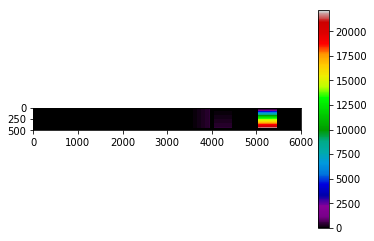

In [5]:
# Example of what the entire array looks like
imgplot = plt.imshow(deformation_np)
imgplot.set_cmap('nipy_spectral')
plt.colorbar()
plt.show()

#### Discussion:

The scale of sub9 (the rainbow section) is so high it blows all the other scales out of proportion

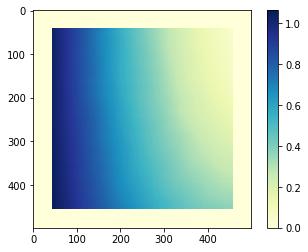

In [15]:
# Results for the reference image
imgplot = plt.imshow(x)
imgplot.set_cmap('YlGnBu')
plt.colorbar()
plt.show()

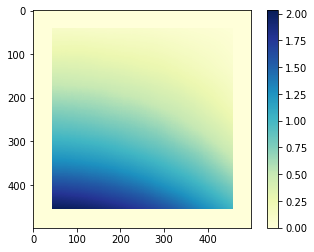

In [14]:
# Results for the deformed image
imgplot = plt.imshow(y)
imgplot.set_cmap('YlGnBu')
plt.colorbar()
plt.show()

#### Discussion:
I'm not entirely sure what is being shown here, if anyone wants to chime in on these results that would be lovely.

Note: imshow has a tendency to rotate images, I dont know when it happens or why. It shouldnt change our interpretation though, just something to be mindful of.

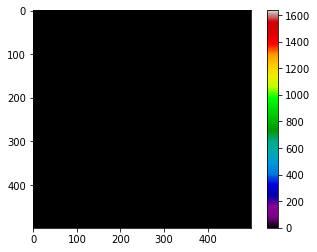

In [10]:
# Change the frame in imshow to see what each dataset looks like
imgplot = plt.imshow(sub12)
imgplot.set_cmap('nipy_spectral')
plt.colorbar()
plt.show()

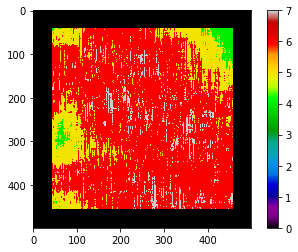

In [11]:
# Just another plot in case you wanted to compare
# (I cant be bothered creating multiple axis)
imgplot = plt.imshow(sub10)
imgplot.set_cmap('nipy_spectral')
plt.colorbar()
plt.show()

In [12]:
residual = (x**2 + y**2 )**0.5

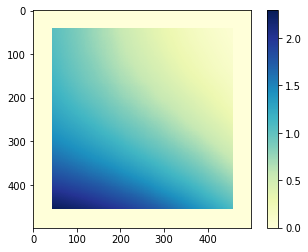

In [13]:
imgplot = plt.imshow(residual)
imgplot.set_cmap('YlGnBu')
plt.colorbar()
plt.show()

### Working on removing the horizontal stripey lines in the x & y image
Try to make any values > 2std away from the mean == 0?

In [22]:
x_mean = np.mean(x)

y_mean = np.mean(y)

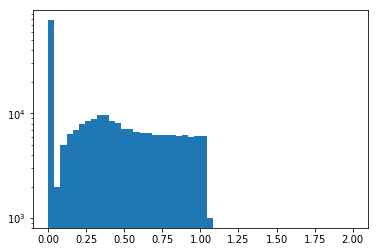

In [23]:
n, bins, patches = plt.hist(x.flatten(), 50, range=(0,2))
plt.yscale('log', nonposy='clip')
plt.show()

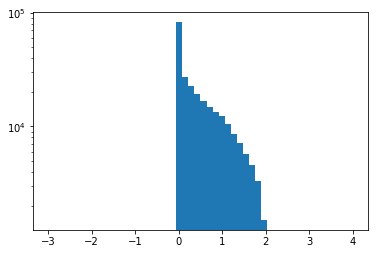

In [24]:
n, bins, patches = plt.hist(y.flatten(), 50, range=(-3,4))
plt.yscale('log', nonposy='clip')
plt.show()

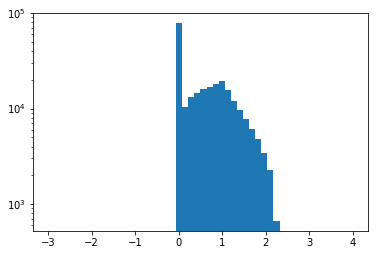

In [25]:
n, bins, patches = plt.hist(residual.flatten(), 50, range=(-3,4))
plt.yscale('log', nonposy='clip')
plt.show()